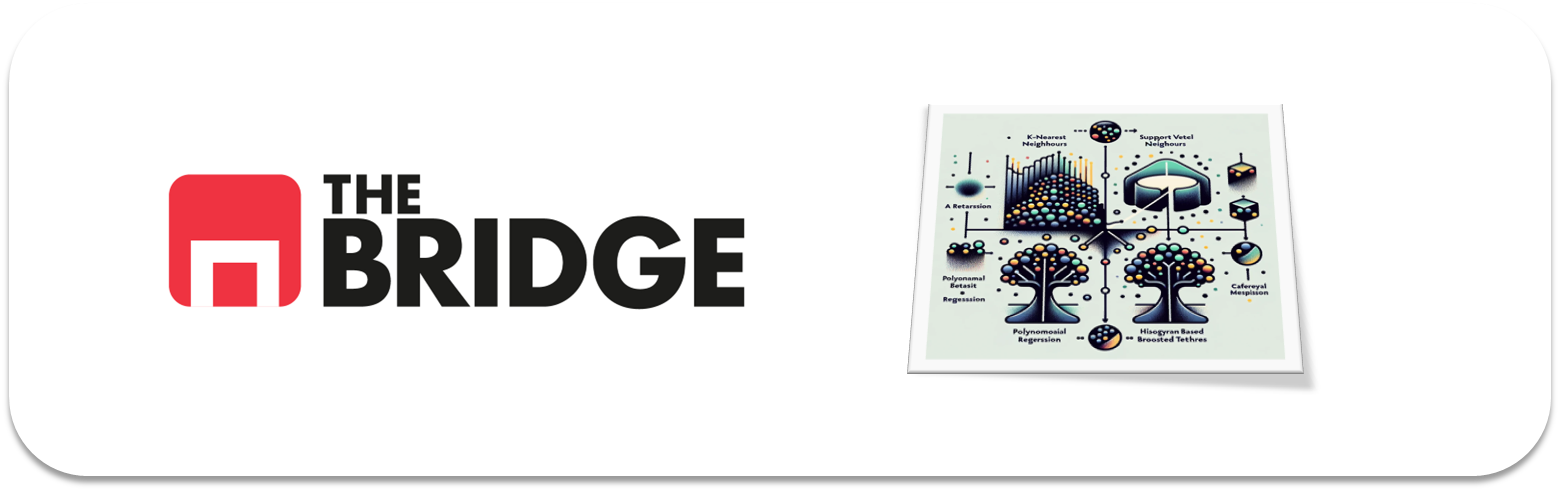

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
from sklearn.model_selection import train_test_split 
import numpy as np 

import bootcampviztools as bt 
import toolbox_ML as tbml
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df_vino = pd.read_csv("./data/wines_dataset.csv", sep="|")
df_vino.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df_vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 1 ELECCION DE TARGETS.

In [4]:
target_cla = df_vino["quality"]
target_reg = df_vino["alcohol"]

### 2.1 DISTRIBUCION DEL PRIMER TARGET, CALIDAD DEL VINO.

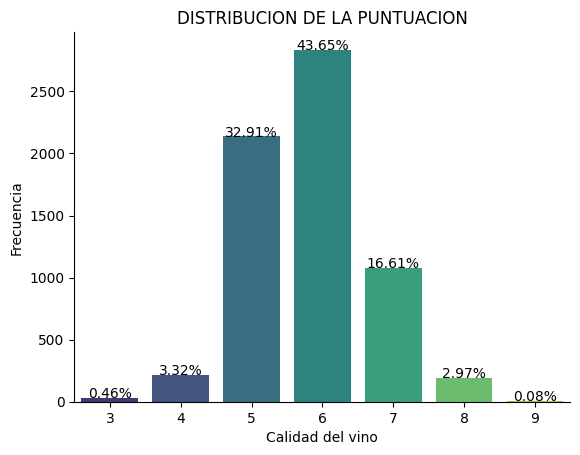

In [5]:

total = float(len(df_vino))  
ax = sns.countplot(data=df_vino, x="quality", palette='viridis')

plt.title("DISTRIBUCION DE LA PUNTUACION")
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.5,
            '{:.2f}%'.format((height/total) * 100),
            ha="center")
sns.despine()
plt.show()

>Vemos que la "nota" más baja es 3 y la más alta es un 9. Las notas más comunes son 5 (con un 32.91% de apariciones) y 6 (apareciendo el 43.65% de las veces); por el contrario, las notas que menos aparecen son 3 (solo se dieron el 0.46% de las veces) y 9 (se dieron el 0.08%). Podríamos decir que la gráfica tiene una forma parecida a la normal.

### 2.2 DISTRIBUCION DEL SEGUNDO TARGET, CONTENIDO ALCOHOLICO.

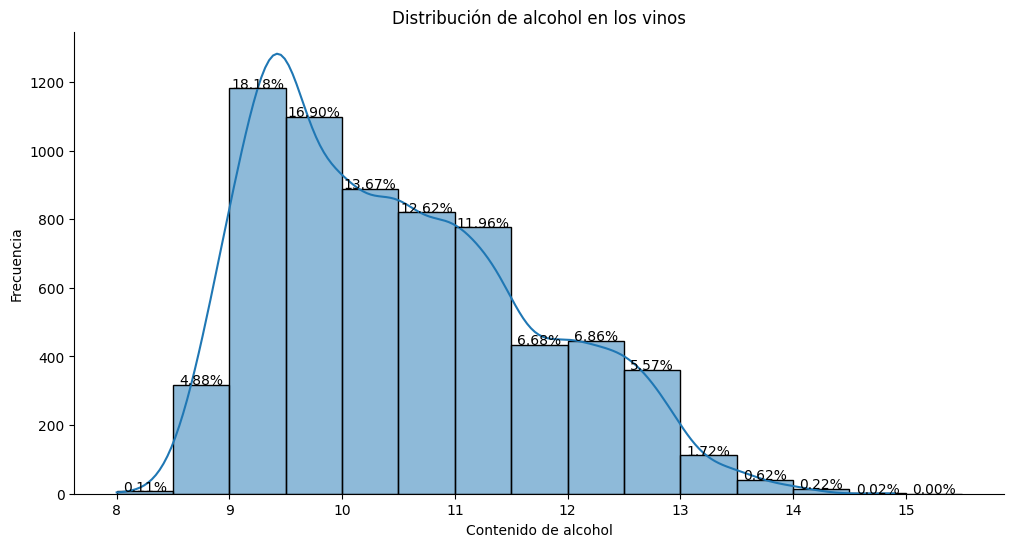

In [6]:

bins = np.arange(8, 16, 0.5)

plt.figure(figsize=(12, 6))
ax_al = sns.histplot(df_vino['alcohol'], bins=bins, kde=True) 


for por in ax_al.patches:
    height = por.get_height()
    ax_al.text(por.get_x() + por.get_width()/2.,
            height + 0.5,
            '{:.2f}%'.format((height/total) * 100),
            ha="center")

plt.title('Distribución de alcohol en los vinos')
plt.xlabel('Contenido de alcohol')
plt.ylabel('Frecuencia')

sns.despine()

plt.show()



>Debido a la gran cantidad de valores distintos para la distribución de los contenidos alcohólicos, para la representación gráfica de estos se han agrupado en grupos que van aumentando 0.5 unidades, siendo 8 el mínimo y 15 el máximo. Observamos que al principio aumenta rápidamente, pasando de un 0.11% de apariciones en el primer grupo al 18.18% en la 3ª columna, siendo esta además la columna más grande, para luego disminuir poco a poco hasta la 14ª columna con un 0.02% de apariciones. Es decir, su cola izquierda es corta y su derecha es larga.

## 3 SPLIT. 
>Como tenemos 2 targets y dos tipos de modelo, haré una copia y usaré uno para un target y otra para el otro target.

In [7]:
df_vino_alcohol = df_vino.copy()

### 3.1 SPLIT PARA "quality" COMO TARGET.

In [8]:
target_calidad = "quality"
train_set_calidad, test_set_calidad = train_test_split(df_vino, test_size= 0.2, random_state= 42)
X_train_calidad = train_set_calidad.drop(target_calidad, axis = 1)
y_train_calidad = train_set_calidad[target_calidad]
X_test_calidad = test_set_calidad.drop(target_calidad, axis = 1)
y_test_calidad = test_set_calidad[target_calidad]

### 3.2 SPLIT PARA "alcohol" COMO TARGET.

In [9]:
target_alcohol = "alcohol"
train_set_alcohol, test_set_alcohol = train_test_split(df_vino_alcohol, test_size= 0.2, random_state= 42)
X_train_alcohol = train_set_alcohol.drop(target_alcohol, axis = 1)
y_train_alcohol = train_set_alcohol[target_alcohol]
X_test_alcohol = test_set_alcohol.drop(target_alcohol, axis = 1)
y_test_alcohol = test_set_alcohol[target_alcohol]

## MINI EDA

### 4.1 CORRELEACIONES.

>Para el EDA, uniremos los datos de X_train y de y_train en un nuevo DataFrame

In [10]:
df_EDA = pd.concat([X_train_calidad , y_train_calidad ], axis=1)

In [11]:
df_EDA['class'] = df_EDA['class'].replace({'red': 0, 'white': 1})
df_EDA['class'] = df_EDA['class'].replace({'red': 0, 'white': 1})

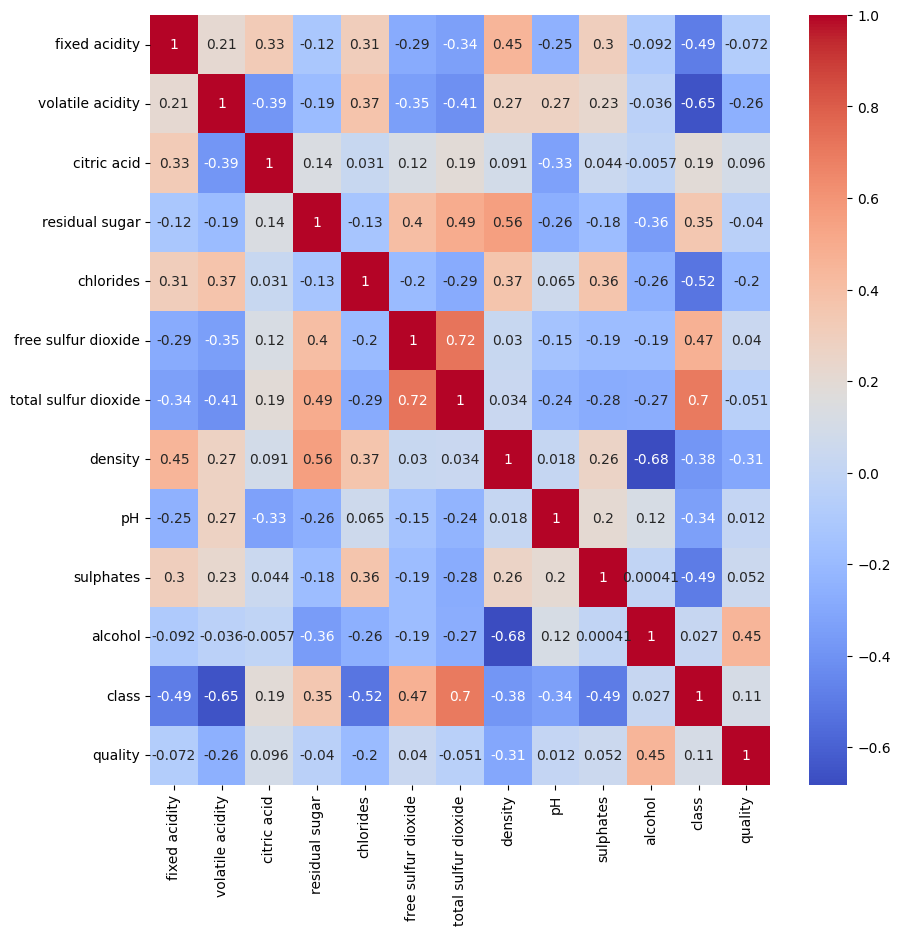

In [12]:
corr_matrix = df_EDA.corr()
plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot= True);

### 4.2 MINI EDA CON "quality" COMO TARGET.

In [13]:
#features_calidad = 	['volatile acidity',	'chlorides', 'density',	'alcohol', 'class'] #Elegimos aquellos con correlacion igual o superior a 0.1 
features_calidad = 	['volatile acidity', 'chlorides', 'alcohol' ]  #He quitado las features con colinealidad.

In [14]:

categorical_col = ["quality", 'class'] 
numerical_col = ['fixed acidity	volatile', 'acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol'	]

In [15]:
X_train_calidad_num = X_train_calidad.drop('class', axis= 1)
X_train_calidad['class'] = X_train_calidad['class'].replace({'red': 0, 'white': 1})
X_test_calidad['class'] = X_test_calidad['class'].replace({'red': 0, 'white': 1})

X_train_calidad_cat = X_train_calidad[["class"]]

In [16]:
df_y_train_calidad = pd.DataFrame(y_train_calidad)

### RELACION ENTRE VARIABLES NUMERICAS Y EL TARGET CALIDAD.

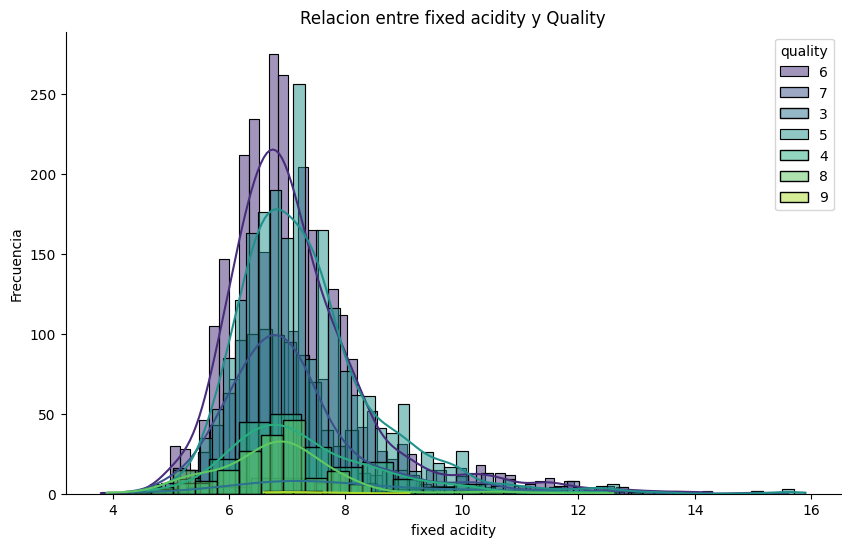

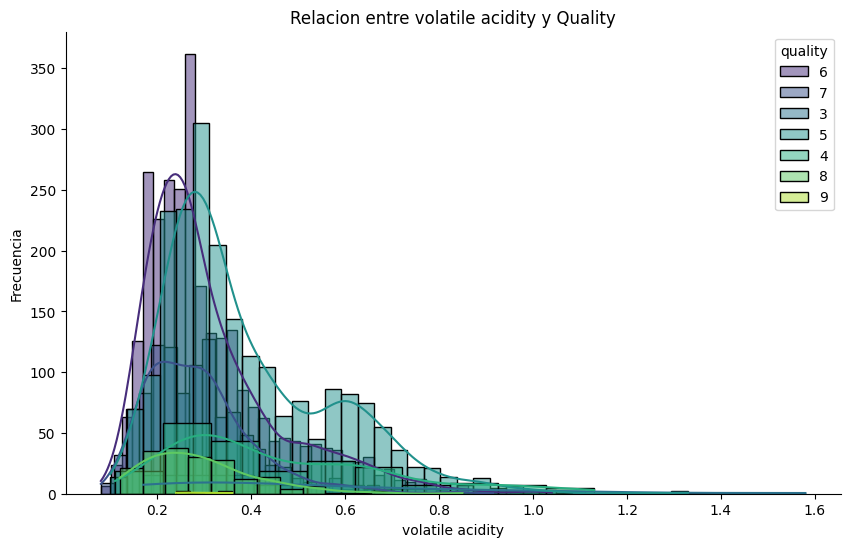

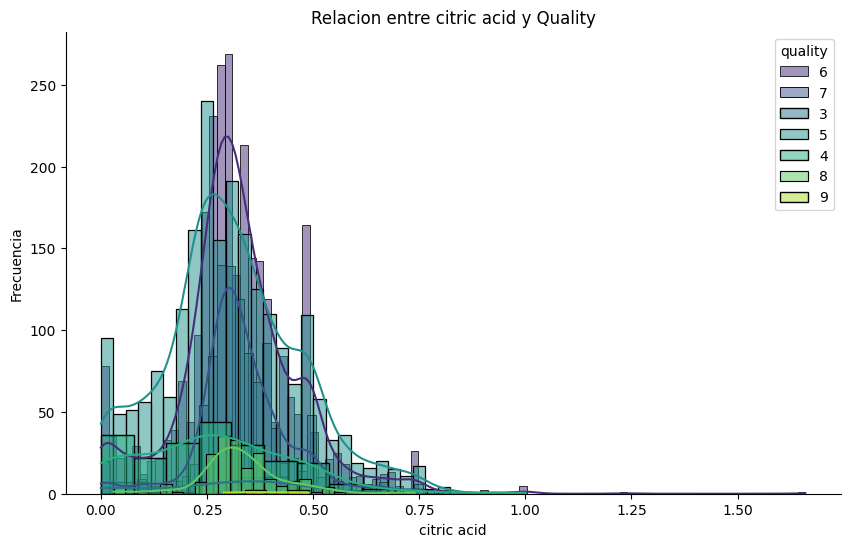

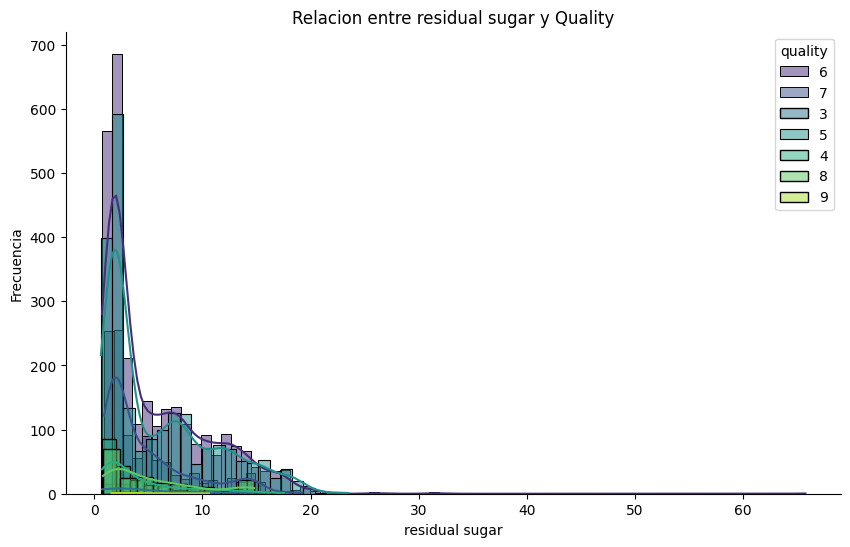

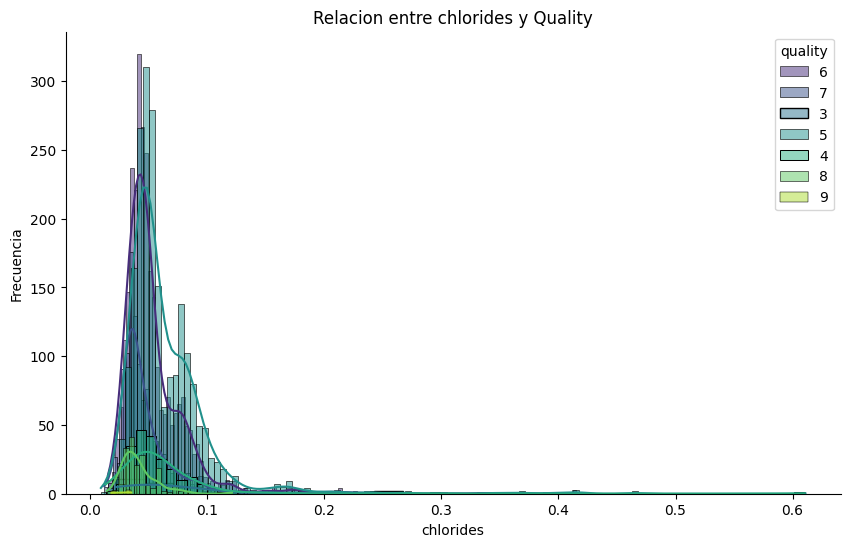

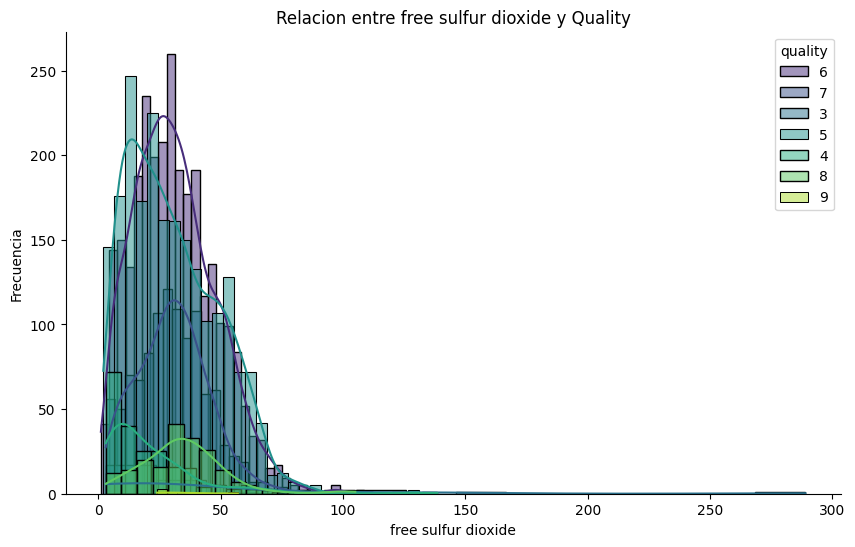

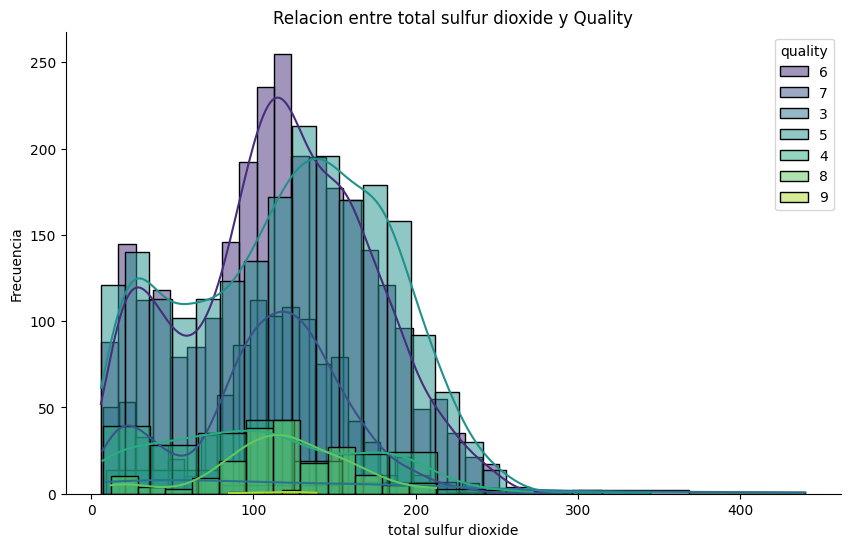

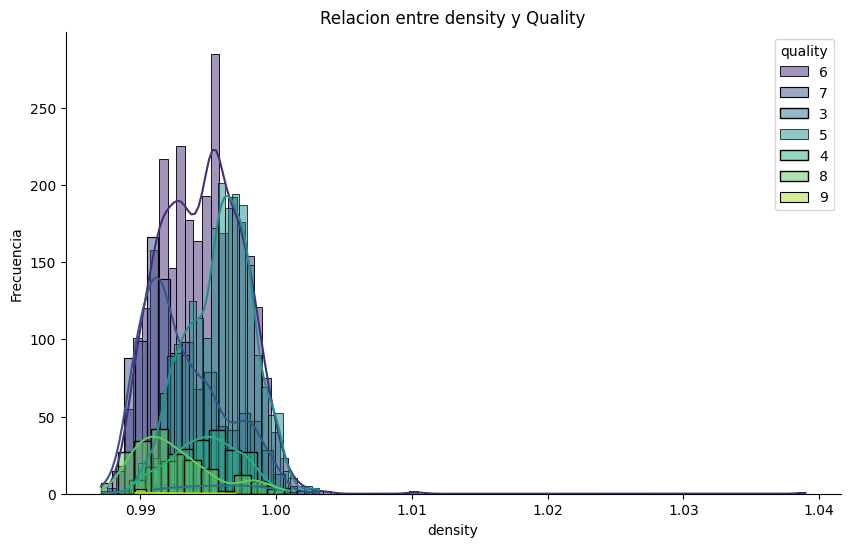

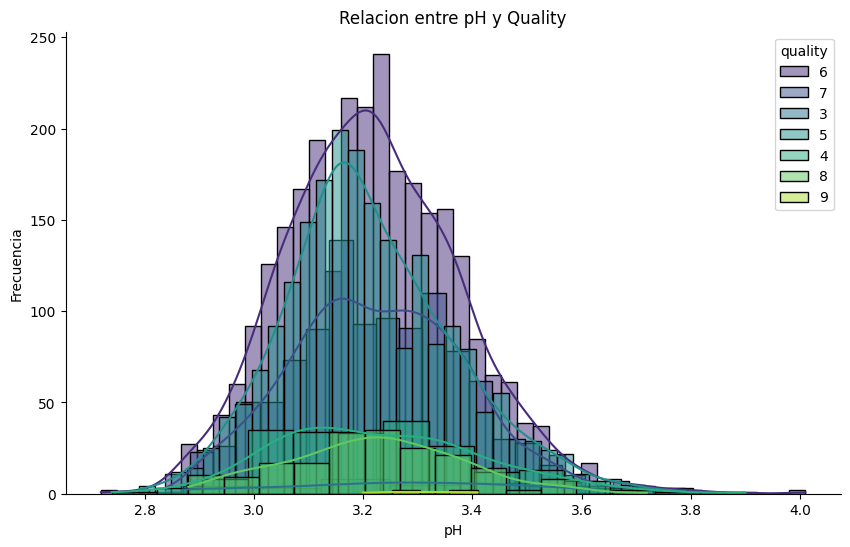

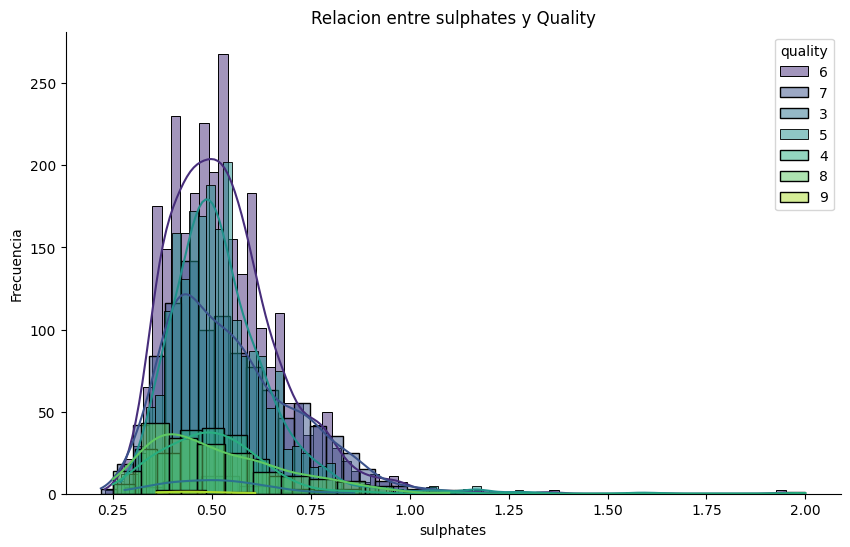

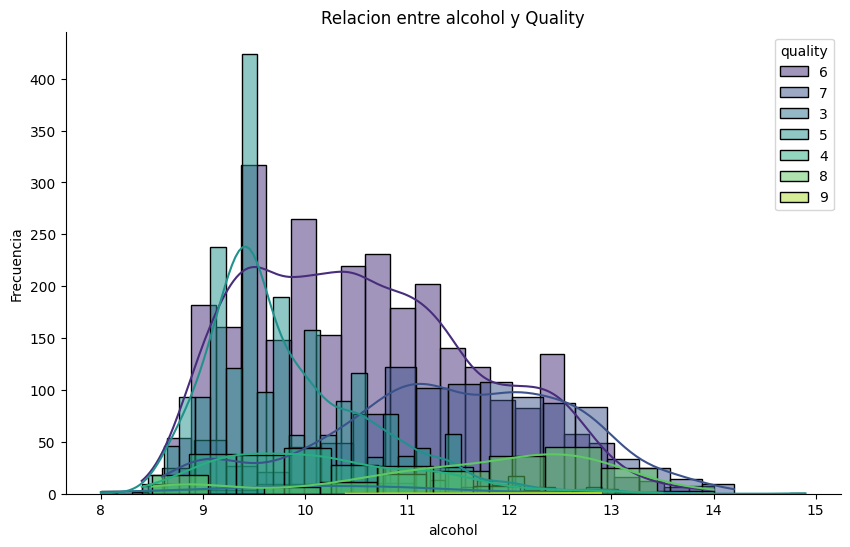

In [17]:
numerical_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for colu in numerical_col: 
    quality_values = df_vino['quality'].unique()
    palette = sns.color_palette("viridis", len(quality_values))
    plt.figure(figsize=(10, 6))

    for quality_val, color in zip(quality_values, palette):
        sns.histplot(data=df_vino[df_vino['quality'] == quality_val], x=colu, color=color, label=f"{quality_val}", kde=True)

    plt.title(f"Relacion entre {colu} y Quality")
    plt.xlabel(f"{colu}")
    plt.ylabel("Frecuencia")
    sns.despine()


    plt.legend(title="quality")
    plt.show()


### RELACION ENTRE CATEGORICAS.

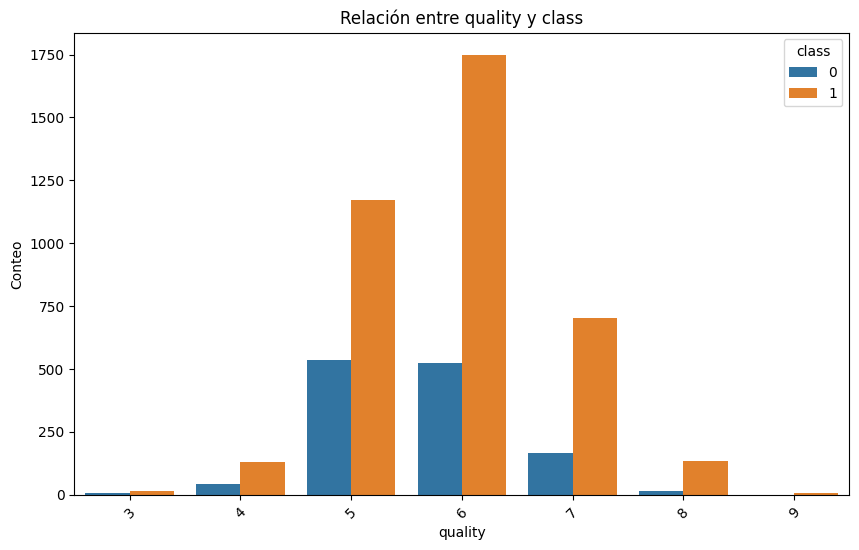

In [18]:
bt.plot_categorical_relationship_fin(df_EDA, 'quality', 'class', relative_freq=False, show_values=False, size_group = 9)

### 3.2 MINI EDA CON "alcohol" COMO TARGET.

In [19]:
#features_alcohol = 	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'quality' #Elegimos aquellos con correlacion igual o superior a 0.1 
features_alcohol = 'residual sugar',	'chlorides',	'total sulfur dioxide',	'density',	'pH',	'quality'#Quitando colinealiadades

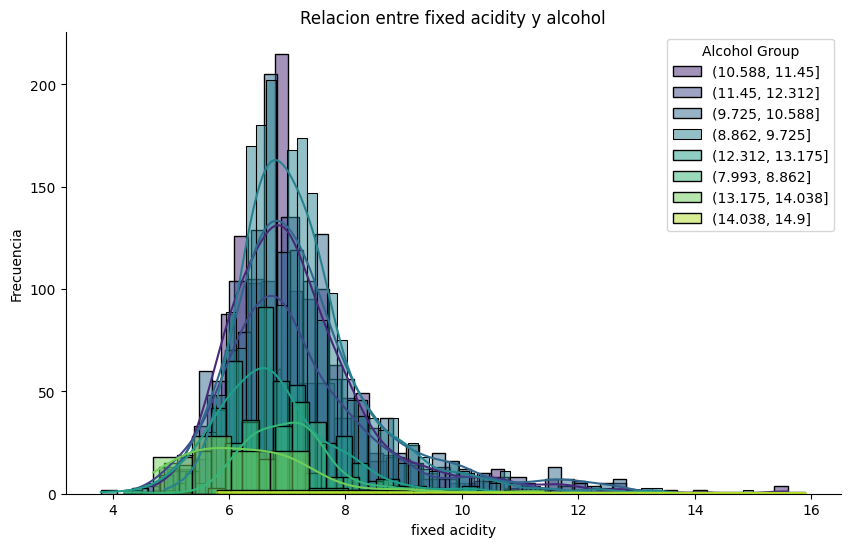

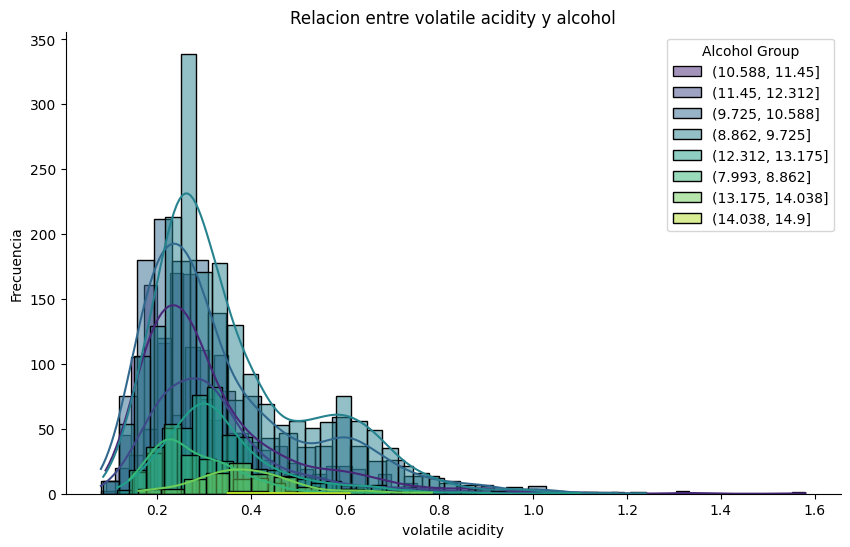

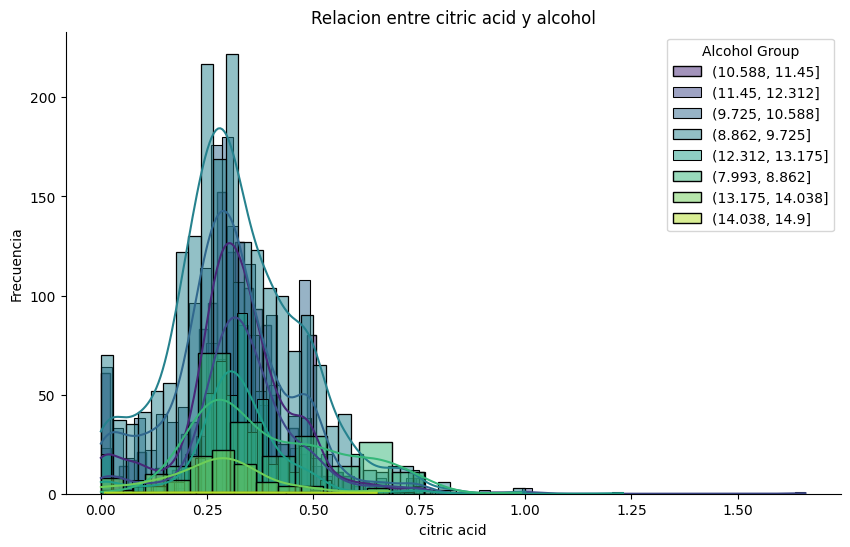

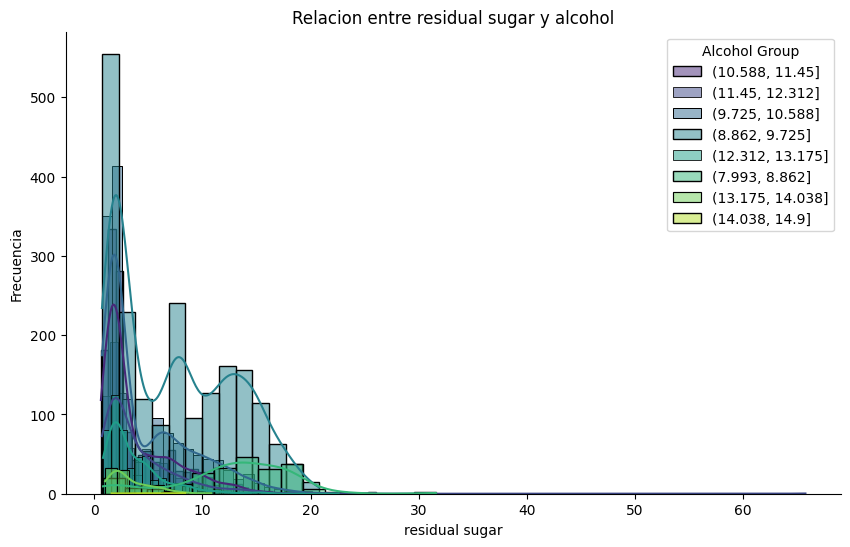

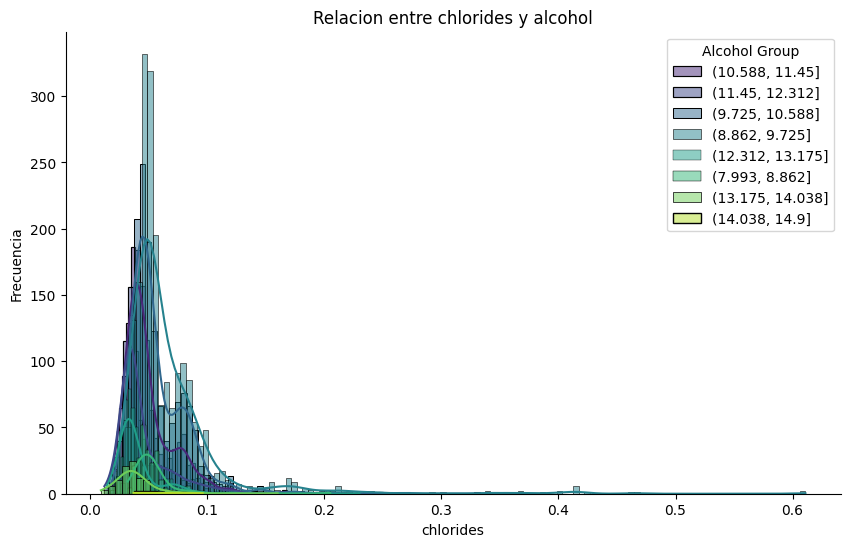

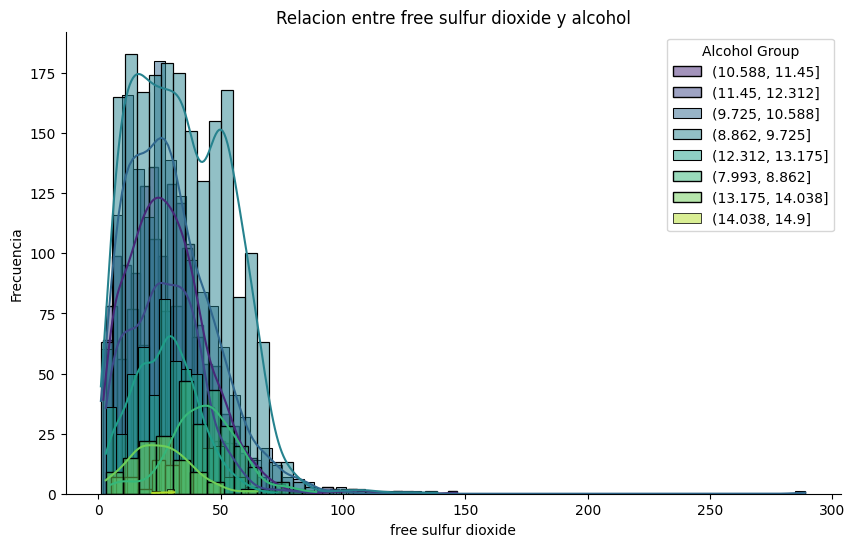

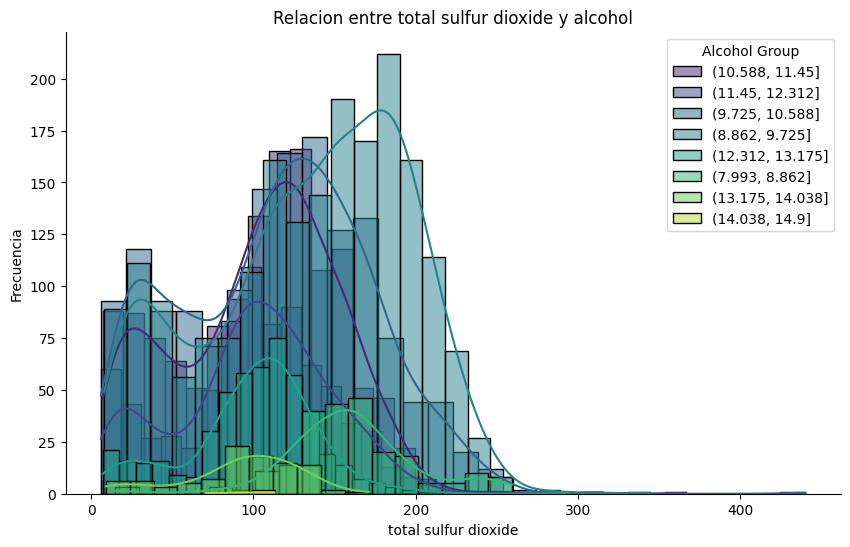

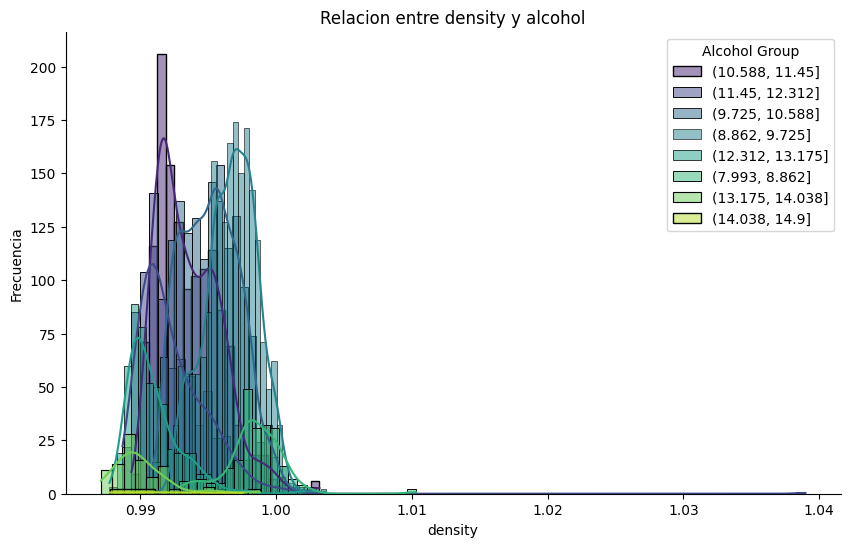

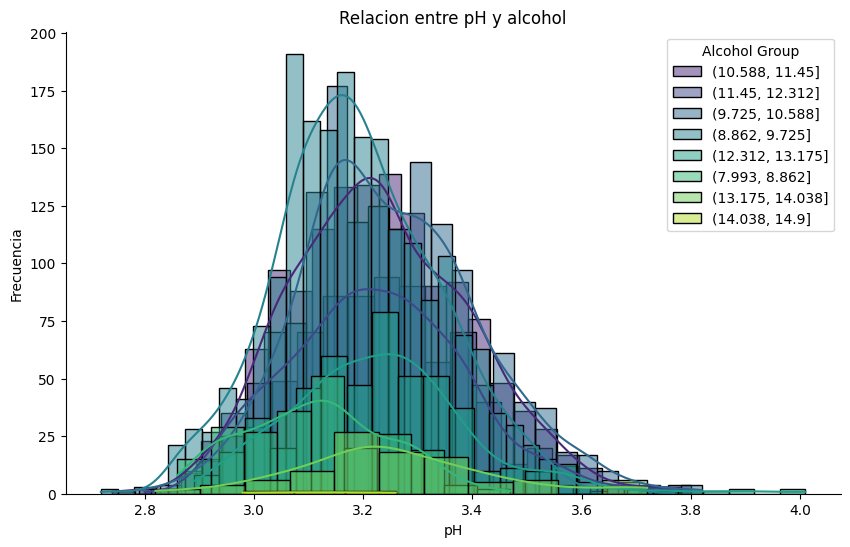

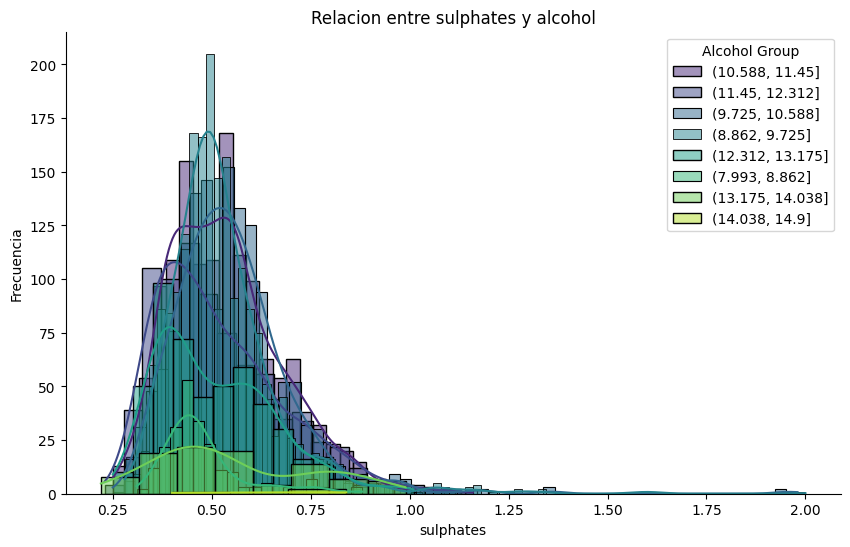

In [57]:
numerical_col_alc = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

# Discretizar la columna 'alcohol' en intervalos
df_vino['alcohol_group'] = pd.cut(df_vino['alcohol'], bins=8)  # Puedes ajustar el número de bins según sea necesario

for colu in numerical_col_alc: 
    alcohol_groups = df_vino['alcohol_group'].unique()
    palette = sns.color_palette("viridis", len(alcohol_groups))
    plt.figure(figsize=(10, 6))

    for alcohol_group, color in zip(alcohol_groups, palette):
        sns.histplot(data=df_vino[df_vino['alcohol_group'] == alcohol_group], x=colu, color=color, label=f"{alcohol_group}", kde=True)

    plt.title(f"Relacion entre {colu} y alcohol")
    plt.xlabel(f"{colu}")
    plt.ylabel("Frecuencia")
    sns.despine()

    plt.legend(title="Alcohol Group")
    plt.show()

# Eliminar la columna 'alcohol_group' para evitar confusiones
df_vino.drop(columns=['alcohol_group'], inplace=True)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

# KNN 
> Primero debemos escalar, KNN es sensible a las escalas

In [21]:

scaler = StandardScaler()

X_train_calidad = pd.DataFrame(scaler.fit_transform(X_train_calidad), columns= X_train_calidad.columns, index= X_train_calidad.index)
X_test_calidad = pd.DataFrame(scaler.fit_transform(X_test_calidad), columns= X_test_calidad.columns, index= X_test_calidad.index)

>Con equilibrado

In [22]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_calidad_smote, y_train_calidad_smote = smote.fit_resample(X_train_calidad, y_train_calidad)

In [23]:
knn_model_smote = KNeighborsClassifier(n_neighbors=2)
knn_model_smote.fit(X_train_calidad_smote, y_train_calidad_smote) 


KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred_knn_smote= knn_model_smote.predict(X_test_calidad)

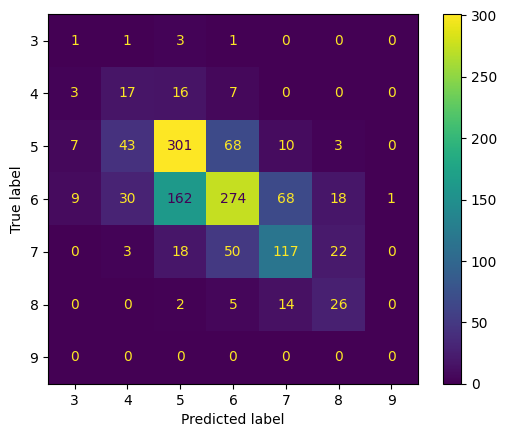

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test_calidad, y_pred_knn_smote);

In [26]:
print(classification_report(y_test_calidad, y_pred_knn_smote))

              precision    recall  f1-score   support

           3       0.05      0.17      0.08         6
           4       0.18      0.40      0.25        43
           5       0.60      0.70      0.64       432
           6       0.68      0.49      0.57       562
           7       0.56      0.56      0.56       210
           8       0.38      0.55      0.45        47
           9       0.00      0.00      0.00         0

    accuracy                           0.57      1300
   macro avg       0.35      0.41      0.36      1300
weighted avg       0.60      0.57      0.57      1300



C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [27]:
knn_equilibrado = cross_val_score(knn_model_smote, X_train_calidad_smote, y_train_calidad_smote, cv = 2, scoring = "recall_macro")

In [28]:
knn_equilibrado

array([0.848976 , 0.8604096])

>SIN EQUILIBRADO

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_calidad, y_train_calidad) 
y_pred_knn= knn_model.predict(X_test_calidad)

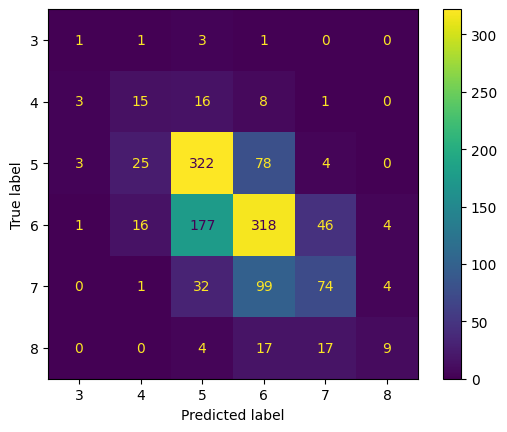

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test_calidad, y_pred_knn);

In [31]:
print(classification_report(y_test_calidad, y_pred_knn))

              precision    recall  f1-score   support

           3       0.12      0.17      0.14         6
           4       0.26      0.35      0.30        43
           5       0.58      0.75      0.65       432
           6       0.61      0.57      0.59       562
           7       0.52      0.35      0.42       210
           8       0.53      0.19      0.28        47

    accuracy                           0.57      1300
   macro avg       0.44      0.40      0.40      1300
weighted avg       0.57      0.57      0.56      1300



In [32]:
knn_desequilibrado = cross_val_score(knn_model, X_train_calidad, y_train_calidad, cv = 2, scoring = "recall_macro")

In [33]:
knn_desequilibrado

array([0.26256782, 0.28875068])

# LogisticRegression

In [34]:
model_log_reg = LogisticRegression(max_iter=1000)

In [35]:
model_log_reg.fit(X_train_calidad_smote, y_train_calidad_smote)

LogisticRegression(max_iter=1000)

In [36]:
pred_log_reg = model_log_reg.predict(X_test_calidad)

In [37]:
print(classification_report(y_test_calidad, pred_log_reg))

              precision    recall  f1-score   support

           3       0.02      0.50      0.04         6
           4       0.12      0.42      0.18        43
           5       0.55      0.44      0.49       432
           6       0.58      0.26      0.36       562
           7       0.30      0.28      0.29       210
           8       0.09      0.40      0.15        47
           9       0.00      0.00      0.00         0

    accuracy                           0.33      1300
   macro avg       0.24      0.33      0.22      1300
weighted avg       0.49      0.33      0.38      1300



C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pepea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [38]:
regresion_logistica = cross_val_score(model_log_reg, X_train_calidad_smote, y_train_calidad_smote, cv = 2, scoring = "recall_macro")

In [39]:
regresion_logistica.max()

0.514763161201156

# RANDON FOREST

In [40]:
mod_randon_forest = RandomForestClassifier()



In [41]:
mod_randon_forest.fit(X_train_calidad_smote, y_train_calidad_smote)



RandomForestClassifier()

In [42]:

pred_rand_forest = mod_randon_forest.predict(X_test_calidad)

In [43]:
arboles_abole = cross_val_score(mod_randon_forest, X_train_calidad_smote, y_train_calidad_smote, cv = 2, scoring = "recall_macro")

In [44]:
arboles_abole.max()

0.8914436486995854

### OPTIMIZAMOS.

In [45]:

param_grid = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [0.5, 1, 2, 4],  
    'bootstrap': [True, False]  
}

grid_search = GridSearchCV(estimator=mod_randon_forest, param_grid=param_grid, cv=4, n_jobs=-1, verbose=3)
grid_search.fit(X_train_calidad_smote, y_train_calidad_smote)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_




arboles_abole_opti = cross_val_score(best_model, X_train_calidad_smote, y_train_calidad_smote, cv = 2, scoring = "recall_macro")

print("El mejor recal es:", arboles_abole_opti)



Fitting 4 folds for each of 288 candidates, totalling 1152 fits
Mejores parámetros: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
El mejor recal es: [0.88239729 0.89910793]


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

### PREPARACION DE LOS DATOS

> Usaremos solo las features con correlacion con el target superior a 0.1 y sin colinialidad.

In [46]:
X_train_alcohol = X_train_alcohol[['residual sugar','chlorides','total sulfur dioxide',	'density','pH','quality']]
X_test_alcohol= X_test_alcohol[['residual sugar','chlorides','total sulfur dioxide',	'density','pH','quality']]

In [47]:
X_train_alcohol = pd.DataFrame(scaler.fit_transform(X_train_alcohol), columns= X_train_alcohol.columns, index= X_train_alcohol.index)
X_test_alcohol = pd.DataFrame(scaler.fit_transform(X_test_alcohol), columns= X_test_alcohol.columns, index= X_test_alcohol.index)

# DEFINICION DE LOS MODELOS

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}


# Entrenado y evaluacion.

In [49]:
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_alcohol, y_train_alcohol, cv=5, scoring='neg_mean_squared_error')
    results[name] = -cv_results.mean()

# Mostrar los resultados
for name, mse in results.items():
    print(f"EL ERROR CUADRATICO MEDIO DE {name} ES: {mse}")


EL ERROR CUADRATICO MEDIO DE Linear Regression ES: 0.5409018800567406
EL ERROR CUADRATICO MEDIO DE Decision Tree ES: 0.4407951459351896
EL ERROR CUADRATICO MEDIO DE Random Forest ES: 0.24505542700553384
EL ERROR CUADRATICO MEDIO DE KNN ES: 0.37927796575627465
EL ERROR CUADRATICO MEDIO DE Gradient Boosting ES: 0.3140987325806475
EL ERROR CUADRATICO MEDIO DE XGBoost ES: 0.2673368528520047


### OPTIMIZAMOS.

### Random Forest

In [50]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_alcohol, y_train_alcohol)

print(f"Random Forest - Best parameters: {grid_search_rf.best_params_}")
print(f"Random Forest - Best score: {-grid_search_rf.best_score_}")


Random Forest - Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best score: 0.24425473009032098


### Gradient Boosting

In [51]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train_alcohol, y_train_alcohol)

print(f"Gradient Boosting - Best parameters: {grid_search_gb.best_params_}")
print(f"Gradient Boosting - Best score: {-grid_search_gb.best_score_}")


Gradient Boosting - Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Gradient Boosting - Best score: 0.2625201117275099


### XGBoost

In [52]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_alcohol, y_train_alcohol)

print(f"XGBoost - Best parameters: {grid_search_xgb.best_params_}")
print(f"XGBoost - Best score: {-grid_search_xgb.best_score_}")


XGBoost - Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
XGBoost - Best score: 0.25546847534043754


### ARBOL DE DECISION

In [53]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_alcohol, y_train_alcohol)

print(f"Decision Tree - Best parameters: {grid_search_dt.best_params_}")
print(f"Decision Tree - Best score: {-grid_search_dt.best_score_}")


Decision Tree - Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree - Best score: 0.3868547125604067


### KNN

In [54]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_alcohol, y_train_alcohol)

print(f"KNN - Best parameters: {grid_search_knn.best_params_}")
print(f"KNN - Best score: {-grid_search_knn.best_score_}")


KNN - Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
KNN - Best score: 0.3035992690689687


### EVALUACION MODELOS

In [55]:

best_model = grid_search_rf.best_estimator_


y_pred = best_model.predict(X_test_alcohol)


mse = mean_squared_error(y_test_alcohol, y_pred)
r2 = r2_score(y_test_alcohol, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R^2: {r2}")


Test MSE: 0.25316224631013057
Test R^2: 0.8203623461700286


### Evaluación final de todos los modelos

In [56]:

# Regresión Lineal
best_model_lr = LinearRegression()
best_model_lr.fit(X_train_alcohol, y_train_alcohol)
y_pred_lr = best_model_lr.predict(X_test_alcohol)
mse_lr = mean_squared_error(y_test_alcohol, y_pred_lr)
r2_lr = r2_score(y_test_alcohol, y_pred_lr)
print(f"Linear Regression - Test MSE: {mse_lr}")
print(f"Linear Regression - Test R^2: {r2_lr}")

# Árbol de Decisión
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test_alcohol)
mse_dt = mean_squared_error(y_test_alcohol, y_pred_dt)
r2_dt = r2_score(y_test_alcohol, y_pred_dt)
print(f"Decision Tree - Test MSE: {mse_dt}")
print(f"Decision Tree - Test R^2: {r2_dt}")

# KNN
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test_alcohol)
mse_knn = mean_squared_error(y_test_alcohol, y_pred_knn)
r2_knn = r2_score(y_test_alcohol, y_pred_knn)
print(f"KNN - Test MSE: {mse_knn}")
print(f"KNN - Test R^2: {r2_knn}")

# Random Forest
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test_alcohol)
mse_rf = mean_squared_error(y_test_alcohol, y_pred_rf)
r2_rf = r2_score(y_test_alcohol, y_pred_rf)
print(f"Random Forest - Test MSE: {mse_rf}")
print(f"Random Forest - Test R^2: {r2_rf}")

# Gradient Boosting
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test_alcohol)
mse_gb = mean_squared_error(y_test_alcohol, y_pred_gb)
r2_gb = r2_score(y_test_alcohol, y_pred_gb)
print(f"Gradient Boosting - Test MSE: {mse_gb}")
print(f"Gradient Boosting - Test R^2: {r2_gb}")

# XGBoost
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_alcohol)
mse_xgb = mean_squared_error(y_test_alcohol, y_pred_xgb)
r2_xgb = r2_score(y_test_alcohol, y_pred_xgb)
print(f"XGBoost - Test MSE: {mse_xgb}")
print(f"XGBoost - Test R^2: {r2_xgb}")


Linear Regression - Test MSE: 0.5389895805704504
Linear Regression - Test R^2: 0.6175463557316303
Decision Tree - Test MSE: 0.3874865283518963
Decision Tree - Test R^2: 0.7250491656698894
KNN - Test MSE: 0.3327296461654942
KNN - Test R^2: 0.7639032917900992
Random Forest - Test MSE: 0.25316224631013057
Random Forest - Test R^2: 0.8203623461700286
Gradient Boosting - Test MSE: 0.267469986486226
Gradient Boosting - Test R^2: 0.8102099284446225
XGBoost - Test MSE: 0.3105404016263441
XGBoost - Test R^2: 0.7796482296209535
